# Data Mining Versuch Music Clustering
* Autor: Prof. Dr. Johannes Maucher
* Datum: 16.10.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Musikdateien
* Transcodierung von mp3 zu wav 
* Extraktion von Merkmalen in Musikdateien (Feature Extraction)
* Optimierung mit dem genetischen Algorithmus
* Selektion der aussagekräftigsten Merkmale (Feature Selection)
* Clustering von Musikfiles (automatische Playlistgenerierung)



## Vor dem Versuch zu klärende Fragen

### Transcodierung von MP3 nach WAV und Merkmalsextraktion

In diesem Versuch wird der MP3 Decoder [mpg123](http://www.mpg123.de/) eingesetzt. Installieren und testen sie diesen Decoder vor dem Versuch auf ihrem Rechner. Machen Sie sich zunächst mit dem in Kapitel [Gegebene Module zur Transcodierung und Feature Extraction](#Gegebene-Module-zur-Transcodierung-und-Feature-Extraction) aufgeführten Code vertraut. Versuchen Sie Funktion und Ablauf dieses Programms zu verstehen und beantworten Sie folgende Fragen.

1. Was versteht man unter den statistischen Größen _Mittelwert, Standardabweichung, Skewness und Kurtosis_?

   - **Mittelwert:**  
     Das arithmetische Mittel gibt den Durchschnittswert über eine endliche Menge an Zahlen an.  
     Addiert man jede Zahl der Menge und teilt das Ergebnis durch die Anzahl, erhält man den Mittelwert.  
     ​

   - **Standartabweichung: **  
     Bei der Standartabweichung geht es darum wie weit oder wie breit sich die Werte um den Mittelwert streuen.   
     Ist die Standartabweichung gering so sind die Punkte nah beieinander.  
     ​

   - **Skewness: **
     Ist eine Kennzahl, die die Art und Stärke der asymmetrie einer Wahrscheinlichkeisverteilung beschreibt. 

     Sie kann nach links(negative Schiefe) oder rechts(positive Schiefe) geneigt sein.  
     Auf den Median und der Standartabweichung bezogen bedeutet das (nach Pearson):  

     S (skewness) = (Erwartungswert - median) / Standartabweichung  

     Dabei liegt S im werte Bereich von [-1,1]  
     ​

   - **Kurtosis: **  
     Ist eine Kennzahl für die Steilheit einer eingipfligen Wahrscheinlichkeitsverteilung, Dichte- 
     oder Häufigkeitsverteilung.  
     Verteilung mit geringer Kurtosis streuen relativ gleichmäßig, bei Verteilungen mit großer Wölbung sind mehr
     extrem Werte zu sehen.  
     ​

1. Was beschreibt die Fourier-Transformierte eines zeitlich ausgedehnten Signals?

   - Die Fourier-Transformation dekonstruiert das Signal.   
     Es zeigt aus welchen Sinuswellen das Signal zusammengebaut ist.   
     Man wechselt quasi die Sicht von der zeitlichen Ebene auf die Spektralsicht.    
     Die X-Achse zeigt nun den Fequenzbereich.    
     Zu jedem Zeitpunkt kann nun ein Auschnitt generiert werden, der die Amplitudenlänge auf der Y-Achse für jede
     Sinuswelle anzeigt.    
     Nun erkennt man welche Welle in welchem Frequenzbereich liegt und wie stark diese ist.  
     ​

2. Mit welcher Samplingrate werden die WAV Dateien abgetastet?     

   -  Eine gängige Abtastrate für WAV-Dateien sind 44.100 Abtastungen pro Sekunde = 44,1 kHz  
     ​

3. Insgesamt werden 42 Merkmale pro Musiksequenz extrahiert. Beschreiben Sie kurz diese Merkmale

    - Die Merkmale sind unter anderem die Standartabweichung, der Mittelwert,  
    die Kurtosis und der Skewness der Dynamik des Signals.  
    ​
    
    - Die Merkmale, beginnend mit "power1" bis "power10", spalten den Fequrenzbereich in 10 Bereiche  
    powerN – Durchschnittslautstärke in 10 Frequenzbereichen      
    ​
    
    - ampN Dynamik des Signals  
    ampNmean – Mittelwert der Dynamik  
    ampNstd  – Standardabweichung    
    ampNskew – Skewness   
    ampNkurt – Kurtosis  
    ​
    
    - ampNd ist das selbe mit der Ableitung der Dynamik  
    .  
    .  
    .  
    ​
    
    - N gibt den Frequenzbereich an (1, 10, 100, 1000)  



### Matching der Teilsequenzen

1. Nachdem für jedes Musikstück die beiden Teilsequenzen in Form der extrahierten Merkmale vorliegen: Wie kann die Ähnlichkeit zwischen Teilsequenzen ermittelt werden?
    
    - Die Ermittlung einer Ähnlichkeit eines Vektors kann durch unterschiedliche Algorithmen ermittelt werden.  
    So zum Beispiel durch die euklidische Distanz oder den Pearson Algorithmus. 
    
2. Welche Numpy- bzw. Scipy-Module können Sie für die Bestimmung der Ähnlichkeit zwischen Teilsequenzen einsetzen?
    
    - scipy.spatial.distance -> euclidean() – euklidische Distanz  
    - scipy.stats -> pearsonr() – pearson Korrelation

### Genetischer Algorithmus für die Merkmalsselektion

1. Beschreiben Sie die Prozesschritte im genetischen Algorithmus [Genetischer Algorithmus](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html)
    
    - **Population**  
    Eine Population ist eine Menge von Individuen. Ein Individuum ist ein Lösungskandidat für ein Problem.  
    Diese Menge zufälliger Zustände(Chromosomen) wird am Beginn des Algurithmus erzeugt.  
    Ergebnis ist ein Vektor/Liste mit allen möglichen Lösungskandidaten.  
    ​
    
    - **Fitnessfunktion**  
    Eine Funktion zur Evaluierung der neuen Chromosomen
    Sie berechnet die Güte eines Chromosoms.  
    ​
    
    - **Selektion**  
    ist die Auswahl eines Chromosomenpaars(Elternpaar) für die welches dann für die Kreuzung genutzt wird.
    Das Chromosomenpaar wird annhand seiner Fitness gewählt.
    Z. B. Je höher der Wert eines Chromosomenpaares dass durch die Evaluierungsfunktion ermittelt wurde, umso 
    wahrscheinlicher wird es für die Reproduktion verwendet.  
    ​

    - **Kreuzung**
    Hierbei werden aus dem Elternpaar Nachkommen generiert.
    Die erstellung der Nachkommen muss andwedungspezifisch angepasst werden und zweckdienlich sein.
    Es gibt verschieden Lösungsansätze.  
    Z. B. der 1-Punkt-Cross-Over – Hier wird ein zufälliger Index zur vereinigung der Elternvektoren genutzt.
    Die Chromosome werden an diesem Index geteilt und miteinander vertauscht.  
    ​

    - **Mutation**
    Mit geringer wahrscheinlichkeit wird eine Mutation vollzogen.  
    Dabei wird eines Nachkommen zufällig gesetzt.  
    ​

    - **Austausch**
    Wenn ein Nachkommen eine bessere Fitness als einer der Ursprungspopulation aufweisen, werden diese ersetzt.  
    Dabei darf das Einfügen nicht zu duplikaten führen.  
    ​    
    
2. In diesem Versuch wird davon ausgegangen, dass Merkmale dann gut sind, wenn durch sie die erste Teilsequenz eines Musikstücks durch einen ähnlichen Vektor wie die jeweils zweite Teilsequenz beschrieben wird. Wie kann mit dieser Annahme der genetische Algorithmus für die Merkmalsselektion angewandt werden. Unter Merkmalsselektion versteht man allgemein die Suche nach den $r$ besten Merkmalen aus einer Menge von insgesamt $R$ Merkmalen. In diesem Versuch werden initial $R=42$ Merkmale extrahiert, aus denen dann die besten $r<R$ Merkmale zu bestimmen sind. Überlegen Sie hierfür speziell wie die Fitnessfunktion, die Kreuzung und die Mutation zu realisieren sind.

    * **Realisierung**  
    Die Annahme sei, dass jeder Song in Zwei Teilsequenzen, Head und Tail, geteilt wird.  
    Aus jeder Teilsequenz werden 42 Merkmale extrahiert. Bei 70 Songs ergeben sich 140 Merkmals Vektoren. 
        * **Fitnessfunktion**  
        Zu jedem Head wird die euklidische Distanz zu allen Tails erzeugt.  
        Diese werden in eine Liste Gespeichert. Vergleicht man nun die Distanz des Paares Head_A/Tail_A  
        mit den Distanzen von Head_A mit den restlichen Tails, ergibt sich eine art Ranking.  
        Ist die Distanz für Tail_A nur an dritter Stelle, wird für Head_A der mittlere Rang 3 eingetragen.  
        * **Kreuzung**  
        Die Chromosomen werden zufällig ausgewählt.  
        Dabei spielt die Fitness eine Rolle, je höher das Ranking desto höher die Wahrscheinlichkeit,  
        dass diese Ausgewählt werden. 
        * **Mutation**  
        Mit sehr geringer Wahrscheinlichkeit wird nach der Kreuzung ein zufälliges Merkmal in einem Chromosom neu gewürfelt. 

### Clustering und Playlistgenerierung

1. Wie kann mit einem hierarchischen Clustering der Musikfiles eine Menge von Playlists erzeugt werden, so dass innerhalb einer Playlist möglichst ähnliche Titel zu finden sind?
    - **Hierarchisches Clustering**
     Hier wird ein agglomeratives Clusterverfahren angewendet. Jedes Objekt bildet dabei am Anfang ein eigenes
     Cluster. Schritt für Schritt werden die Cluster zusammengefasst.  
     Man benötigt die euklidische Distanz zu allen anderen Vektoren. 
     Nun schaut man sich das Ähnlichkeitsmaß an und zieht eine Grenze für das Cluster. Die grenze sei 10. 
     Das heißt, es werden alle Vektoren die innerhalb der euklidischen Distanz von 10, zu einem bestimmten Vektor, 
     in ein gemeinsames Cluster geworfen. Möchte man nun eine Playlist erstellen mit vielen unterschiedlichen 
     Genre, muss das Cluster so vergrößert werden, dass auch der letzte Song, der die weiteste Distanz aufweist, 
     mit einbezogen werden kann. Innerhalb dieses Clusters finden sich natürlich auch viele andere Songs die nicht 
     Teil der Playlist sind. Diese Songs können nun wiederum dazu genutzt werden, um eine zufällig neue Playlist zu 
     erstellen.  
     
**Notiz :**  
Es gibt unterschiedliche Mechanismen um die Distanz zwischen Clustern zu bestimmen und sie zu vereinigen. Besitzt ein Cluster mehr als ein Objekt müssen andere Fusionierungsalgorithmen her:  

| Algorithmus     | Verwendungszweck | 
| --------------- |:----------------:| 
| Single-Linkage  |Minimaler Abstand aller Elementpaare <br> aus den beiden Clustern|
| Complete-Linkage|Maximaler Abstand aller Elementpaare <br> aus den beiden Clustern|  
| Average-Linkage |Durchschnittlicher Abstand aller <br> Elementpaare aus den beiden Clustern
| Average-Group-Linkage|Durchschnittlicher Abstand aller <br> Elementpaare aus der Vereinigung von A und B 

und weitere. 

# Durchführung
## Gegebene Module zur Transcodierung und Feature Extraction
Mit dem in diesem Abschnitt gegebenen Code werden die im Unterverzeichnis _BandCollection_ befindlichen mp3-Files zunächst in wave decodiert. Danach werden aus den wave Dateien Audiomerkmale erhoben.

Von jedem Musikstück werden zwei disjunkte Teilsequenzen erhoben und von beiden Teilsequenzen jeweils ein Merkmalsvektor gebildet. Der Grund hierfür ist: Für die später folgende Bestimmung der wichtigsten Merkmale (Merkmalsselektion mit dem genetischen Algorithmus), wird angenommen dass Merkmale dann gut sind, wenn die aus ihnen gebildeten Merkmalsvektoren für Teilsequenzen des gleichen Musikstücks nahe beieinander liegen und die Merkmalsvektoren von Teilsequenzen unterschiedlicher Musikstücke weiter voneinander entfernt sind. In der Merkmalsselektion werden dann die Merkmale als relevant erachtet, für die diese Annahme zutrifft. 

**Aufgaben:**

1. Stellen Sie im unten gegebenen Code die Verzeichnisse für Ihre Musikdateien (aktuell Unterverzeichnis _BandCollection_) und für den Ort Ihres _mpg123_ Decoders richtig ein.
2. Die verwendete Musiksammlung sollte mindestens 5 verschiedene Interpreten möglichst unterschiedlicher Genres enthalten. Von jedem Interpret sollten mehrere Titel (evtl. ein ganzes Album) enthalten sein.
3. Führen Sie den in diesem Abschnitt gegebenen Programmcode zur Audiofeature-Extraction aus. Damit werden für alle Musiksequenzen jeweils 42 Merkmale extrahiert. Die extrahierten Merkmalsvektoren der jeweils ersten Sequenz werden in das File _FeatureFileTrainingAllList1.csv_ geschrieben, die der zweiten Teilsequen in das File _FeatureFileTestAllList2.csv_. 


In [2]:
import subprocess
import wave
import struct
import numpy
import os
import pandas as pd

numpy.set_printoptions(precision=2,suppress=True)

#Names of features extracted in this module
FeatNames=["amp1mean","amp1std","amp1skew","amp1kurt","amp1dmean","amp1dstd","amp1dskew","amp1dkurt","amp10mean","amp10std",
           "amp10skew","amp10kurt","amp10dmean","amp10dstd","amp10dskew","amp10dkurt","amp100mean","amp100std","amp100skew",
           "amp100kurt","amp100dmean","amp100dstd","amp100dskew","amp100dkurt","amp1000mean","amp1000std","amp1000skew",
           "amp1000kurt","amp1000dmean","amp1000dstd","amp1000dskew","amp1000dkurt","power1","power2","power3","power4",
           "power5","power6","power7","power8","power9","power10"]

In [3]:
def moments(x):
    mean = x.mean()
    std = x.var()**0.5
    skewness = ((x - mean)**3).mean() / std**3
    kurtosis = ((x - mean)**4).mean() / std**4
    return [mean, std, skewness, kurtosis]

In [4]:
#Feature category 2: Frequency domain parameters
def fftfeatures(wavdata):
    f = numpy.fft.fft(wavdata)
    f = f[2:(f.size / 2 + 1)]
    f = abs(f)
    total_power = f.sum()
    f = numpy.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [5]:
#Creating the entire feature vector per music-file
def features(x):
    x = numpy.array(x)
    f = []

    xs = x
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 10).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 100).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 1000).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    f.extend(fftfeatures(x))
    return f

In [6]:
def read_wav(wav_file):
    """Returns two chunks of sound data from wave file."""
    w = wave.open(wav_file)
    n = 60 * 10000
    if w.getnframes() < n * 3:
        raise ValueError('Wave file too short')
    #For each music file 2 sequences, each containing n frames are subtracted. The first sequence starts at postion n,
    #the second sequence starts at postion 2n. The reason for extracting 2 subsequences is, that later on we like to
    #find the best features and in this exercise we assume that good features have the property that they are similar for 2 subsequences
    #of the same song, but differ for subsequences of different songs.
    w.setpos(n)
    frames = w.readframes(n)
    wav_data1 = struct.unpack('%dh' % n, frames)
    frames = w.readframes(n)
    wav_data2 = struct.unpack('%dh' % n, frames)
    return wav_data1, wav_data2

In [7]:
def compute_chunk_features(mp3_file):
    """Return feature vectors for two chunks of an MP3 file."""
    # Extract MP3 file to a mono, 10kHz WAV file
    #mpg123_command = 'C:\Program Files (x86)\mpg123-1.22.0-x86\mpg123-1.22.0-x86\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    #mpg123_command = 'C:\\Program Files (x86)\\mpg123-1.21.0-x86-64\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    mpg123_command = 'mpg123 -w "%s" -r 10000 -m "%s"'
    out_file = 'temp.wav'
    cmd = mpg123_command % (out_file, mp3_file)
    temp = subprocess.call(cmd, shell=True)
    # Read in chunks of data from WAV file
    wav_data1, wav_data2 = read_wav(out_file)
    # We'll cover how the features are computed in the next section!
    return numpy.array(features(wav_data1)), numpy.array(features(wav_data2))

In [ ]:
fileList=[]
featureList1=[]
featureList2=[]
#Specify the name of the directory, which contains your MP3 files here.
# This directory should contain for each band/author one subdirectory, which contains all songs of this author
for path, dirs, files in os.walk('./Resources/BandCollection'):    
    #print '-'*10,dirs,files
    for f in files:
        if not f.endswith('.mp3'):
            # Skip any non-MP3 files
            continue
        mp3_file = os.path.join(path, f)
        print mp3_file
        # Extract the track name (i.e. the file name) plus the names
        # of the two preceding directories. This will be useful
        # later for plotting.
        tail, track = os.path.split(mp3_file)
        tail, dir1 = os.path.split(tail)
        tail, dir2 = os.path.split(tail)
        # Compute features. feature_vec1 and feature_vec2 are lists of floating
        # point numbers representing the statistical features we have extracted
        # from the raw sound data.
        try:
            feature_vec1, feature_vec2 = compute_chunk_features(mp3_file)
        except:
            print "Error: Chunk Features failed"
            continue
        #title=str(track)
        title=str(dir1)+'\\'+str(track)
        print '-'*20+ title +'-'*20
        #print "       feature vector 1:",feature_vec1
        #print "       feature vector 2:",feature_vec2
        fileList.append(title)
        featureList1.append(feature_vec1)
        featureList2.append(feature_vec2)

# Write feature vecotrs of all music files to pandas data-frame
MusicFeaturesTrain=pd.DataFrame(index=fileList,data=numpy.array(featureList1),columns=FeatNames)
MusicFeaturesTrain.to_csv("FeatureFileTrainingAllList1.csv")

MusicFeaturesTest=pd.DataFrame(index=fileList,data=numpy.array(featureList2),columns=FeatNames)
MusicFeaturesTest.to_csv("FeatureFileTestAllList2.csv")

./Resources/BandCollection/LanaDelRey/03 Blue Jeans (Remastered).mp3
--------------------LanaDelRey\03 Blue Jeans (Remastered).mp3--------------------
./Resources/BandCollection/LanaDelRey/05 Diet Mountain Dew.mp3
--------------------LanaDelRey\05 Diet Mountain Dew.mp3--------------------
./Resources/BandCollection/LanaDelRey/06 National Anthem.mp3
--------------------LanaDelRey\06 National Anthem.mp3--------------------
./Resources/BandCollection/LanaDelRey/08 Radio.mp3
--------------------LanaDelRey\08 Radio.mp3--------------------
./Resources/BandCollection/LanaDelRey/11 Summertime Sadness.mp3
--------------------LanaDelRey\11 Summertime Sadness.mp3--------------------
./Resources/BandCollection/LanaDelRey/02 Off to the Races.mp3
--------------------LanaDelRey\02 Off to the Races.mp3--------------------
./Resources/BandCollection/LanaDelRey/07 Dark Paradise.mp3
--------------------LanaDelRey\07 Dark Paradise.mp3--------------------
./Resources/BandCollection/LanaDelRey/04 Video Game

## Matching der Teilsequenzen
In diesem Abschnitt soll ein Verfahren implementiert werden, mit dem die Übereinstimmung der ersten Teilsequenz eines Musikstücks mit den zweiten Teilsequenzen aller anderen Musikstücke berechnet werden kann.

**Aufagben:**  
1\. Lesen Sie die im vorigen Teilversuch angelegten zwei csv-Dateien in jeweils einen eigenen Pandas Dataframe ein.

In [4]:
from sklearn.preprocessing import scale
import numpy as np

training = pd.read_csv('FeatureFileTrainingAllList1.csv', encoding='utf-8')
test = pd.read_csv('FeatureFileTestAllList2.csv', encoding='utf-8')

2\. Skalieren Sie beide Teilsequenzmengen, so dass alle Merkmale eine Standardabweichung von 1 aufweisen. Z.B. mit [http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html).  

In [5]:
def splitLabelsScaleData(training_data, test_data):
    labels = training['Unnamed: 0'].as_matrix() 
    #labels sind für diesen Versuch in training und test gleich 
    #print (labels_test==labels_train)
    
    #scaled numpyArray data
    data_train = scale(training.drop(['Unnamed: 0'], axis=1))
    data_test = scale(test.drop(['Unnamed: 0'], axis=1))    
    return (labels, data_train, data_test)

labels, data_train, data_test = splitLabelsScaleData(training, test)
#print type(labels) #print type(data_train) #XY_test = np.column_stack((Y_test, X_test)) #print X_test.shape #print Y_test.shape #print XY_test.shape #print XY_test #print X_train #print X_train.std() #print '' #print X_test #print X_test.std()

3\. Bestimmen Sie zu jeder Teilsequenz aus der Datei _FeatureFileTrainingAllList1.csv_ die euklidische Distanz zu allen Teilsequenzen aus der Datei _FeatureFileTestAllList2.csv_ und schreiben Sie diese Distanzen in eine aufsteigend geordnete Liste. Schreiben Sie auch die zugehörigen Argumente (Teilsequenzen) in eine geordnete Liste, sodass für jede Teilsequenz aus _FeatureFileTrainingAllList1.csv_ die am nächsten liegende Teilsequenz aus _FeatureFileTestAllList2.csv_ an erster Stelle steht, die zweitnächste Teilsequenz an zweiter usw.

In [6]:
import scipy.spatial.distance as dc
import scipy.stats as stats
from operator import itemgetter

def calcEuclideanDistances(train_seq, test_seqs, sort=True):
    '''calculates all euclidean distances of one sequence to all the sequences of the test data'''
    distances = np.asarray([dc.euclidean(seq,train_seq) for seq in test_seqs], dtype=np.float32)
    if sort: return sorted(zip(distances, test_seqs), key=itemgetter(0), reverse=False)    
    if not sort: return zip(distances, test_seqs)

#print calcEuclideanDistances(X_train[0], X_test, sort=True)
#for x in calcEuclideanDistances(X_train[0], X_test): print x[0]

4\. Bestimmen Sie über alle Teilsequenzen aus _FeatureFileTrainingAllList1.csv_ den **mittleren Rang** an dem die zugehörige zweite Teilsequenz erscheint. Liegt z.B. für die erste Teilsequenz des Musikstücks A die zweite Teilsequenz nur an fünfter Stelle der geordneten nächsten Nachbarliste. Dann würde diese Teilsequenz mit dem Rang 5 in den Mittelwert einfließen.

In [7]:
def getRank(index, train_seqs, test_seqs, sim_function):
    '''returns rank for the given index'''
    
    # get the corresponding sequences
    train_seq = train_seqs[index]
    belonging_test_seq = test_seqs[index]
    
    # calculate eukidean distances for the train_seq
    distances = sim_function(train_seq, test_seqs, sort=True)
    
    ## check if sorting works
    #for i in distances: print i[0]
    #print (distances[59]<=distances[0])
    #print '––––––––––––––––––––––––––––––––––––'
    
    # find rank of belonging train_seq
    index = [idx for idx, val in enumerate(distances) if (np.array_equal(belonging_test_seq, val[1]))][0]
    return index

#for i in range(len(labels)): print getRank(i,data_train, data_test)

def getMeanRank(train_seqs, test_seqs, sim_function):
    'calculates the average rank over all train data'
    numOfVals = len(train_seqs)
    #print [getRank(i,train_seqs, test_seqs, sim_function) for i in range(numOfVals)]
    return sum([getRank(i,train_seqs, test_seqs, sim_function) for i in range(numOfVals)])/numpy.float64(numOfVals)

print 'mean rank with euclidean distance:', getMeanRank(data_train,data_test, calcEuclideanDistances)

mean rank with euclidean distance: 1.51666666667


5\. Bestimmen Sie jetzt den mittleren Rang, für den Fall, dass _correlation_ anstelle _euclidean_ als Ähnlichkeitsmaß verwendet wird. Welches Ähnlichkeitsmaß ist für diese Anwendung zu bevorzugen?

**Annahme:**  
  In diesem Anwendungsfall ist der tatsächliche Abstand der Vektoren von Interesse.  
  Die Pearson Distanz sollte eine schlechteren Wert ergeben da Sie nur eine Ähnlichkeit der Trendkurven berechnet.

In [14]:
def calcCorrelation(train_seq, test_seqs, sort=True):
    '''calculates pearson correlation of one sequence to all the sequences of the test data'''
    distances = [stats.pearsonr(seq,train_seq)[0] for seq in test_seqs]
    if sort: return sorted(zip(distances, test_seqs), key=itemgetter(0), reverse=True)    
    if not sort: return zip(distances, test_seqs)

print 'mean rank with pearson correlation:', getMeanRank(data_train, data_test, calcCorrelation)
print 'mean rank with euclidean distance:', getMeanRank(data_train, data_test, calcEuclideanDistances)

mean rank with pearson correlation: 1.65
mean rank with euclidean distance: 1.51666666667


Die euklidische Distanz ist tatsächlich kleiner.
Dies bestätigt unsere Annahme deshalb nutzen wir die euklidische Distanz fortgehend.

6\. Diskutieren Sie das Ergebnis  

   - Fraglich ist ob die gewählten Attribute gute Ergebnisse erzielen. Möglicherweise werden Titel die z. B. ruhig 
   anfangen und gegen ende laut und energetisch werden grundsätzlich schlechte Ergebnisse erzielen. 
   Darunter fallen Hymnen, Intros oder Outros. Im Allgemeinen werden die Teile der Titel, die keiner Struktur 
   folgen, schlecht vergleichbar sein.

**Performance Test der getMeanRank Funktion:**

In [149]:
import time
#init time
start = time.time()
#helper function to print time that elapsed since last call
def prtPerformance(message=''):
    global start
    end = time.time()
    print int(round((end - start) * 1000)),'-', message
    start = time.time()
prtPerformance('start')

print 'mean rank with pearson correlation:', getMeanRank(data_train,data_test, calcCorrelation)
prtPerformance('end')

0 - start
mean rank with pearson correlation: 1.65
262 - end


## Merkmalsauswahl mit dem genetischen Algorithmus
In diesem Abschnitt soll unter Anwendung eines selbst zu implementierenden genetischen Algorithmus eine Untermenge wichtiger Merkmale aus den insgesamt 42 angelegten Merkmalen berechnet werden.
Als Vorlage kann hierfür die Implementierung für die [Lösung des TSP Problems](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html) herangezogen werden. Anzupassen sind dann jedoch mindestens die Fitness-Funktion, die Kreuzungs- und die Mutationsfunktion. Die Fitness soll so wie im vorigen Teilabschnitt mit dem mittleren Rang berechnet werden. Die Populationsgröße, die Anzahl der auszuwählenden Merkmale und die Anzahl der Iterationen sollen als Parameter einstellbar sein.

Der Fitnesswert des besten Individuums in der Population soll in jeder Iteration gespeichert werden. Der Verlauf dieses besten Fitness-Wertes über den Fortlauf der Iterationen soll graphisch ausgegeben werden.

Ein Pandas Frame, der nur die berechneten wichtigsten Merkmale aus _FeatureFileTrainingAllList1.csv_ enthält soll angelegt und in die csv Datei _subFeaturesTrain1.csv_ geschrieben werden.

**Aufgaben:** 

1\. Implementieren Sie die die Merkmalsauswahl mit dem genetischen Algorithmus entsprechend der o.g. Beschreibung

In [191]:
# Genetischer Algorithmus für 'Music Feature Selection'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.spatial.distance import pdist,squareform
from numpy.random import choice
    
#numpy random seed
np.random.seed()

#Fitnessfunktion
def testChromosome(chrom, data_train, data_test, correlationFn):
    idxToUse = np.where(chrom==1)[0]
    #sub_data_train = data_train[:, idxToUse]
    #sub_data_test = data_test[:, idxToUse]
    
    #print idxToUse.shape
    #print sub_data_train.shape
    #test where function
    #print 'pop:',data_train[0]
    #print 'idxs:',np.where(data_train[0]==1)[0]    
    return getMeanRank(data_train[:, idxToUse],data_test[:, idxToUse], correlationFn)


#Genetischer Algorithmus
def runGenAlg(data_train, data_test, ITERATIONS, POPSIZE, CROSSPROP, MUTPROP, DISTANCEFN, verbosity=-1):

    #In diesem Array wird für jede Iteration die beste Range gespeichert
    bestRange=np.zeros(ITERATIONS)

    #Erzeugen einer zufälligen Startpopulation von Attributen
    numOfAttributes = len(data_train[0])
    #Die Chromosome bestehen aus einem 42 Werte langem Array gefüllt mit zufälligen binären Werten
    population = np.asarray([np.random.randint(2, size=numOfAttributes) for i in range(POPSIZE)], dtype=np.ndarray)
    #1 bedeutet die Spalte nutzen
    #0 bedeutet Spalte verwerfen
    #print population

    #Speichert die Kosten jedes Chromosoms der aktuellen Population
    rank=np.zeros(POPSIZE)

    #Speichert das beste MeanRank pro Iteration
    bestMeanRank=np.zeros(ITERATIONS) 

    #prtPerformance('start')

    #Berechung der Fitness, der initialen zufälligen Chromosomen
    for j,chrom in enumerate(population): 
        rank[j] = testChromosome(chrom, data_train, data_test, DISTANCEFN)

    #prtPerformance('calcd fitness of init chroms')

    ##################################################################################################
    for it in range(ITERATIONS):

        #Indizees der nach ansteigenden Rank sortierten Chromosomen
        sortedIndex=rank.argsort(axis=0)

        #die ansteigend sortierten MeanRanks
        sortedRank=rank[sortedIndex] 

        #Sortierung der Population nach ansteigenden MeanRanks
        sortedPopulation=population[sortedIndex] 

        #hinzufügen des besten MeanRanks zum bestMeanRank Array
        bestMeanRank[it]=sortedRank[0] 

        if verbosity>(-1) and it%verbosity==0:
            print '-'*10+' Iteration: ','%4s ' %it, '/', '%4s '% ITERATIONS  , '– ', '%-18s ' %sortedRank[0], '-'*10 
            #print sortedPopulation[0]
            #print 'sortedIndex: \n',sortedIndex
            #print 'sortedRank: \n',sortedRank
            #print 'sortedPopulation: \n', sortedPopulation
            #print 'bestMeanRank: \n', bestMeanRank

        #prtPerformance('calcd fitness')


        #2.Selektion: Zufällige Auswahl von Chromosomen aus der Population####################
        #Mit dem folgenden Prozess wird gewährleistet, dass die Wahrscheinlichkeit für die
        #Selektion eines Chromosoms umso größer ist, je größer sein Nutzenwert ist.

        #prtPerformance('start rand parent selection chromosomes')

        # calculate propability for each values
        probDist=1/sortedRank #Berechung der Wahrscheinlichkeit für die selection (Fitness)
        probDist /= probDist.sum() #normalize propabilities (sum of all propabilities is now 1)
        #print 'probDist: \n', probDist

        #get random choice with the respective propabilities
        drawidx = choice(range(sortedPopulation.shape[0]), 2, p=probDist)
        parent1 = sortedPopulation[drawidx[0]]
        parent2 = sortedPopulation[drawidx[1]]

        #prtPerformance('selected parents')

        #print parent1, parent2
        ########## parent1 und parent2 sind die selektierten Chromsomen##############################



        #3.Kreuzung####################################################################################

        #prtPerformance('crossing')

        #calculate if cross should happen based on given propability
        doCross=np.random.rand()<CROSSPROP
        #cross
        if doCross:
            #calc random idx where to cross the chromosomes
            crossIdx = np.random.randint(0, numOfAttributes-1)
            # other calculations for crossIdx
            #crossIdx = (numOfAttributes/2)
            #calc random idx where to cross with gauss deviation
            #crossidx = get_truncated_normal((numOfAttributes-1)/float(2), 6, 0, (numOfAttributes-1)).rvs()
            
            # cross heads and tails
            head1, tail1 = np.split(parent1, [crossIdx])
            head2, tail2 = np.split(parent2, [crossIdx])

            child1=np.append(head1,tail2)
            child2=np.append(head2,tail1)

        #prtPerformance('crossed')
        
        #child1 und child2 sind die Ergebnisse der Kreuzung###############################################

        

        #4. Mutation#########################################################################################

        #prtPerformance('mutating')

        #calculate if mutation should happen based on given propability
        doMut=np.random.rand()<MUTPROP
        #mutate child1
        if doMut:
            numOfMut=np.random.randint(0, numOfAttributes-1)
            mutIdx=np.random.randint(42, size=numOfMut)
            for idx in mutIdx:
                child1[idx]^=1 #swap binary int

        doMut=np.random.rand()<MUTPROP #calculate if mutation should happen based on given propability
        #mutate child2
        if doMut:
            numOfMut=np.random.randint(0, numOfAttributes-1)
            mutIdx=np.random.randint(42, size=numOfMut)
            for idx in mutIdx:
                child2[idx]^=1 #swap binary int

        #prtPerformance('mutated')

        #child1 und child2 sind die Resultate der Mutation################################################



        #5. Ersetze die bisher schlechtesten Chromosomen durch die neu gebildeten Chromosomen, falls die neuen
        #besser sind


        # Berechnung der Fitness beider Kinder
        meanRankChild1= testChromosome(child1, data_train, data_test, DISTANCEFN)
        meanRankChild2 = testChromosome(child2, data_train, data_test, DISTANCEFN)        

        # Hinzufügen der Kinder zur population, wenn die Fitness besser ist

        #prtPerformance('replacing')
        ## wir nutzten diesen code block um die kinder zu ersetzen allerdings erwies sich 
        # der nächste als performanter und verständlicher
        
        replace1=False
        replace2=False
        idx=POPSIZE-1
        '''while idx > 0:
            if sortedRank[idx]>meanRankChild1 and not replace1:
                if not np.ndarray.any(np.ndarray.all(child1==sortedPopulation,axis=1)):
                    sortedPopulation[idx]=child1
                    sortedRank[idx]=meanRankChild1
                replace1=True
            elif sortedRank[idx]>meanRankChild2 and not replace2:
                if not np.ndarray.any(np.ndarray.all(child2==sortedPopulation,axis=1)):
                    sortedPopulation[idx]=child2
                    sortedRank[idx]=meanRankChild2
                replace2=True
            if replace1 and replace2:
                break
            idx=idx-1'''
        
        
        # add Children to sortedPopulation
        #if child1 not in sortedPopulation
        if not np.ndarray.any(np.ndarray.all(child1==sortedPopulation,axis=1)): 
            # find index where child1 should be placed
            idxChild1 = np.searchsorted(sortedRank, meanRankChild1)
            # insert rank into sortedRanks
            sortedRank = np.insert(sortedRank, idxChild1, meanRankChild1, axis=0)
            # insert child1 in population at given index
            sortedPopulation = np.insert(sortedPopulation, idxChild1, child1, axis=0)

        # if child2 not in sortedPopulation:
        if not np.ndarray.any(np.ndarray.all(child2==sortedPopulation,axis=1)):
            # find index where child2 should be placed
            idxChild2 = np.searchsorted(sortedRank, meanRankChild2)
            # insert rank into sortedRanks
            sortedRank = np.insert(sortedRank, idxChild2, meanRankChild2, axis=0)
            # insert child2 in population at given index
            sortedPopulation = np.insert(sortedPopulation, idxChild2, child2, axis=0)

        # clip length of sortedPopulation and sortedRank to POPSIZE
        sortedPopulation = np.split(sortedPopulation,[POPSIZE],axis=0)[0]
        sortedRank = np.split(sortedRank,[POPSIZE],axis=0)[0]

        #prtPerformance('replaced')
                
        # Überschreiben der aktuellen Population und den zugehörigen Ranks
        rank=sortedRank
        population=sortedPopulation

        #print prtPerformance('replaced')
        ######################################Ende der Iteration#############################
    
    return (bestMeanRank, population, rank)

2\. Beschreiben Sie kurz das Konzept ihrer Kreuzungs- und Mutationsfunktion. 
  
- Kreuzung:  
  In der Kreuzungsfunktion nehmen wir einen zufälligen Index.  
  Nun teilen wir die Eltern jeweils an diesem Index
  und vertauschen die resultierenden heads und tails.  
  Daraus ergeben sich 2 Nachkommen:     
  - child1 = headOfParent1 und tailOfParent2
  - child2 = headOfParent2 und tailOfParent1
- Mutation:  
  In der Mutation wird eine zufällige Anzahl von zufälligen Indexen erstellt.
  Die Zufallszahlen können maximal die Zahl der 42 Attribute erreichen.
  Anhand dieser Indicees werden dann im Chromosom die Werte negiert. (XOR Wert -> 1->0, 0->1)


3\. Bestimmen Sie eine möglichst kleine Merkmalsuntermenge mit einem möglichst guten mittleren Rang? Geben Sie sowohl die gefundenen wichtigsten Merkmale als auch den zugehörigen mittleren Rang an.

---------- Iteration:     0  / 1000  –  1.16666666667       ----------
---------- Iteration:   100  / 1000  –  0.7                 ----------
---------- Iteration:   200  / 1000  –  0.516666666667      ----------
---------- Iteration:   300  / 1000  –  0.466666666667      ----------
---------- Iteration:   400  / 1000  –  0.45                ----------
---------- Iteration:   500  / 1000  –  0.45                ----------
---------- Iteration:   600  / 1000  –  0.433333333333      ----------
---------- Iteration:   700  / 1000  –  0.4                 ----------
---------- Iteration:   800  / 1000  –  0.4                 ----------
---------- Iteration:   900  / 1000  –  0.4                 ----------
best mean rank 0.4
best chromosome [1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0
 1 1 1 1 1] 



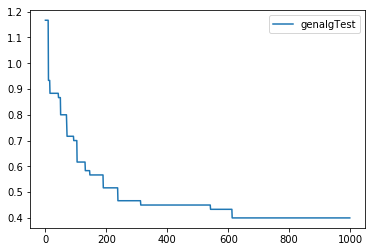

In [193]:
ITERATIONS=1000;
POPSIZE=20;
CROSSPROP=.99;
MUTPROP=.1;
DISTANCEFN=calcEuclideanDistances

bestMeanRank, population, rank = runGenAlg(data_train, data_test, ITERATIONS, POPSIZE, .9, .2, DISTANCEFN, 100)

print "best mean rank", bestMeanRank[-1]
print "best chromosome" ,population[0], '\n'
plt.plot(range(ITERATIONS), bestMeanRank, label='genalgTest')
plt.legend()
plt.show()

In [194]:
resultIdx = np.where(population[0]==1)[0]
print 'Indicees der besten Attribute', resultIdx

Indicees der besten Attribute [ 0  2  6  8 10 14 15 17 21 23 24 25 26 29 32 33 35 37 38 39 40 41]


4\. Um wieviel verschlechtert sich der Mittlere Rang, wenn nur die 10 wichtigsten Merkmale benutzt werden?

 - Mit den ersten 10 Attributen ergibt sich die folgende Verschlechterung

In [205]:
#Erstellung eines chromosoms aus den 10 Indexen
tenTestMerkmale = np.zeros((42,), dtype=np.int)
tenResIdx = np.split(resultIdx,[10],axis=0)[0]
tenTestMerkmale[tenResIdx] = 1
#print tenResIdx
#print tenTestMerkmale

#chromosome vs all attributes
testChrom = testChromosome(tenTestMerkmale, data_train, data_test, DISTANCEFN)
testAllAttr = testChromosome(population[0], data_train, data_test, DISTANCEFN)
print testChrom, ' - ', testAllAttr, '\n'
print 'Verschlechterung um', testChrom-testAllAttr

1.3  -  0.4 

Verschlechterung um 0.9


### Test verschiedener Parameter

---------- Iteration:     0  / 1000  –  1.41666666667       ----------
---------- Iteration:     0  / 1000  –  1.41666666667       ----------
---------- Iteration:     0  / 1000  –  1.41666666667       ----------
---------- Iteration:     0  / 1000  –  1.41666666667       ----------
---------- Iteration:   200  / 1000  –  0.65                ----------
---------- Iteration:   200  / 1000  –  0.633333333333      ----------
---------- Iteration:   200  / 1000  –  0.583333333333      ----------
---------- Iteration:   200  / 1000  –  0.666666666667      ----------
---------- Iteration:   400  / 1000  –  0.55                ----------
---------- Iteration:   400  / 1000  –  0.516666666667      ----------
---------- Iteration:   400  / 1000  –  0.6                 ----------
---------- Iteration:   400  / 1000  –  0.516666666667      ----------
---------- Iteration:   600  / 1000  –  0.45                ----------
---------- Iteration:   600  / 1000  –  0.516666666667      ----------
------

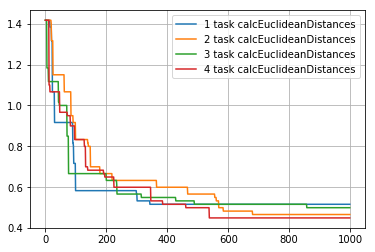

In [85]:
## import multiprocessing
import multiprocessing
pool = multiprocessing.Pool()

#Definition der Konstanten für den genAlg
ITERATIONS=1000;
POPSIZE=50;
CROSSPROP=.9;
MUTPROP=.5;
DISTANCEFN1=calcEuclideanDistances
DISTANCEFN2=calcCorrelation

#parallel execution of 
tasks = []
#tasks.append( (data_train, data_test, ITERATIONS, POPSIZE, CROSSPROP, MUTPROP, DISTANCEFN1, 200) )
tasks.append( (data_train, data_test, ITERATIONS, 10, .99, .1, DISTANCEFN1, 200) )
tasks.append( (data_train, data_test, ITERATIONS, 100, .99, .2, DISTANCEFN1, 200) )
tasks.append( (data_train, data_test, ITERATIONS, 1000, .99, .3, DISTANCEFN1, 200) )
tasks.append( (data_train, data_test, ITERATIONS, 100, .99, .4, DISTANCEFN1, 200) )

results = [pool.apply_async( runGenAlg, t ) for t in tasks]

#plot curves
plt.grid(True)
    
for i,result in enumerate(results):
    res = result.get()
    bestMeanRank = res[0]
    population = res[1]
    label = str(i+1) + ' task ' + tasks[i][6].__name__
    print '\n', label, '\n', '-'*35
    print "best mean rank", bestMeanRank[-1]
    print "best chromosome" ,population[0]
    plt.plot(range(ITERATIONS),bestMeanRank, label=label)
    plt.legend()
    
plt.show() 

-> höhere Mutation glättet die Kurve

---------- Iteration:     0  / 1000  –  0.883333333333      ----------
---------- Iteration:     0  / 1000  –  0.883333333333      ----------
---------- Iteration:     0  / 1000  –  0.883333333333      ----------
---------- Iteration:     0  / 1000  –  0.883333333333      ----------
---------- Iteration:   200  / 1000  –  0.85                ----------
---------- Iteration:   200  / 1000  –  0.883333333333      ----------
---------- Iteration:   200  / 1000  –  0.883333333333      ----------
---------- Iteration:   200  / 1000  –  0.85                ----------
---------- Iteration:   400  / 1000  –  0.85                ----------
---------- Iteration:   400  / 1000  –  0.683333333333      ----------
---------- Iteration:   400  / 1000  –  0.883333333333      ----------
---------- Iteration:   400  / 1000  –  0.85                ----------
---------- Iteration:   600  / 1000  –  0.683333333333      ----------
---------- Iteration:   600  / 1000  –  0.8                 ----------
------

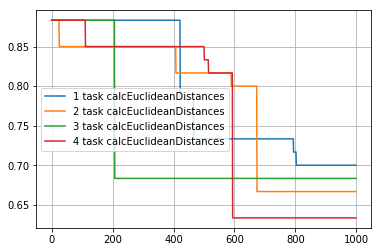

In [86]:
## import multiprocessing
import multiprocessing
pool = multiprocessing.Pool()

#Definition der Konstanten für den genAlg
ITERATIONS=1000;
POPSIZE=50;
CROSSPROP=.9;
MUTPROP=.5;
DISTANCEFN1=calcEuclideanDistances
DISTANCEFN2=calcCorrelation

#parallel execution of 
tasks = []
#tasks.append( (data_train, data_test, ITERATIONS, POPSIZE, CROSSPROP, MUTPROP, DISTANCEFN1, 200) )
tasks.append( (data_train, data_test, ITERATIONS, 1000, .99, .1, DISTANCEFN1, 200) )
tasks.append( (data_train, data_test, ITERATIONS, 1000, .99, .2, DISTANCEFN1, 200) )
tasks.append( (data_train, data_test, ITERATIONS, 1000, .99, .3, DISTANCEFN1, 200) )
tasks.append( (data_train, data_test, ITERATIONS, 1000, .99, .4, DISTANCEFN1, 200) )

results = [pool.apply_async( runGenAlg, t ) for t in tasks]

#plot curves
plt.grid(True)
    
for i,result in enumerate(results):
    res = result.get()
    bestMeanRank = res[0]
    population = res[1]
    label = str(i+1) + ' task ' + tasks[i][6].__name__
    print '\n', label, '\n', '-'*35
    print "best mean rank", bestMeanRank[-1]
    print "best chromosome" ,population[0]
    plt.plot(range(ITERATIONS),bestMeanRank, label=label)
    plt.legend()
    
plt.show() 

-> große Populationen verschlechtern das Ergebnis   
–> verbesserungen der Fitness finden seltener statt

### Sidenotes

[ 0.    0.    0.    0.01  0.02  0.03  0.05  0.08  0.11  0.13  0.13  0.13
  0.11  0.08  0.05  0.03  0.02  0.01  0.    0.  ]


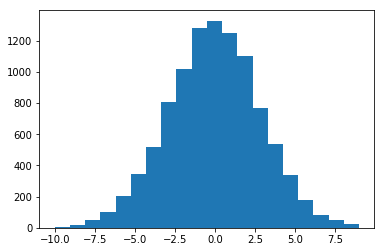

17.1698505582
20.5
6
max 39.9875327521
min 1.10791816977


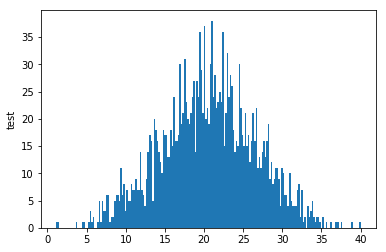

In [380]:
#tested different ways to get a pseudo random number with gaussian distribution – ended up not using it

## attempt 1
import scipy.stats as ss
x = np.arange(-10, 10)
xU, xL = x +.5, x -.5
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() #normalize the probabilities so their sum is 1
print prob
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))
plt.show()

## attempt 2 –  chose this one as it's easier to parameterize
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

mu, sigma = (numOfAttributes-1)/float(2), 6 # mean and standard deviation

X = get_truncated_normal(mu, sigma, 0, 41).rvs(2000)

print mu
print sigma
print 'max', max(X)
print 'min', min(X)

#np.random.choice(range(numOfAttributes),p=)

plt.hist(X,200)
plt.ylabel('test')
plt.show()

## Clustering und automatische Playlistgenerierung
Implementieren Sie ein hierarchisches Clustering aller Subsequenzen in _subFeaturesTrain1.csv_. Diese _.csv_-Datei enthält nur die im vorigen Schritt ermittelten wichtigsten Merkmale. Das hierarchische Clustering ist in einem Dendrogram der Art wie in der unten gegebenen Abbildung zu visualisieren.

Die gefundenen Cluster sind mit den zugehörigen Musiktiteln in der Konsole auszugeben. 

**Aufgaben:**

1. Optimieren Sie die Parameter

    1. metric (Ähnlichkeitsmaß)
    2. linkage method
    3. Clusteranzahl
    
2. Für welche Parameterkonstellation erlangen Sie das für Sie subjektiv betrachtet günstigste Ergebnis?
3. Überlegen Sie sich Ansätze um diese Art der Musikgruppierung zu verbessern?

![Abbildung Music Clustering](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/playlistCluster.png "Music Clustering")

In [136]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pprint as pp
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
#%matplotlib inline
#np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# Data preparation 
# Auswahl der Attribute die vom genetischen Algorithmus ausgewählt wurden
cluster_data = data_test.take(resultIdx , axis=1)
#cluster_data = data_test
print cluster_data.shape

(60, 42)


In [144]:
# generate the linkage matrices with different metric/method combinations
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
euclid_single_matrix = linkage(cluster_data, 'single')

euclid_ward_matrix = linkage(cluster_data, 'ward', metric="euclidean")

cityblock_average_matrix = linkage(cluster_data, 'average', metric="cityblock")

cosine_complete_matrix = linkage(cluster_data, 'complete', metric="cosine")


# This compares (correlates) the actual pairwise distances of all your samples to those implied
# by the hierarchical clustering. The closer the value is to 1, 
# the better the clustering preserves the original distances.
compare1, coph_dists = cophenet(euclid_single_matrix, pdist(cluster_data))
compare2, coph_dists = cophenet(euclid_ward_matrix, pdist(cluster_data))
compare3, coph_dists = cophenet(cityblock_average_matrix, pdist(cluster_data))
compare4, coph_dists = cophenet(cosine_complete_matrix, pdist(cluster_data))

comparison = [("euclid_single_matrix: ", compare1), ( "euclid_ward_matrix: ", compare2),
                ("cityblock_average_matrix: ", compare3), ("cosine_complete_matrix: ", compare4)]

print '\nComparison: method/metric-combinations'
print '#############################################'
for k,v in comparison: print '%-27s ' % k ,':', '%14s ' % v,'\n',



Comparison: method/metric-combinations
#############################################
euclid_single_matrix:        : 0.770338835615  
euclid_ward_matrix:          : 0.457059962503  
cityblock_average_matrix:    : 0.793239835512  
cosine_complete_matrix:      : 0.415528335052  


<h4 style="color:#FF6347"> Auswertung der method/metric-combinations </h1>
***
##### Diskussion 
< insert diskussion> 
Anschließend werden die Daten als Dendogram geplottet, dabei nehmen wir die Daten, die den besten und schlechtesten Wert hatten um einen größtmöglichen Unterschied auch optisch zu erkennen.   

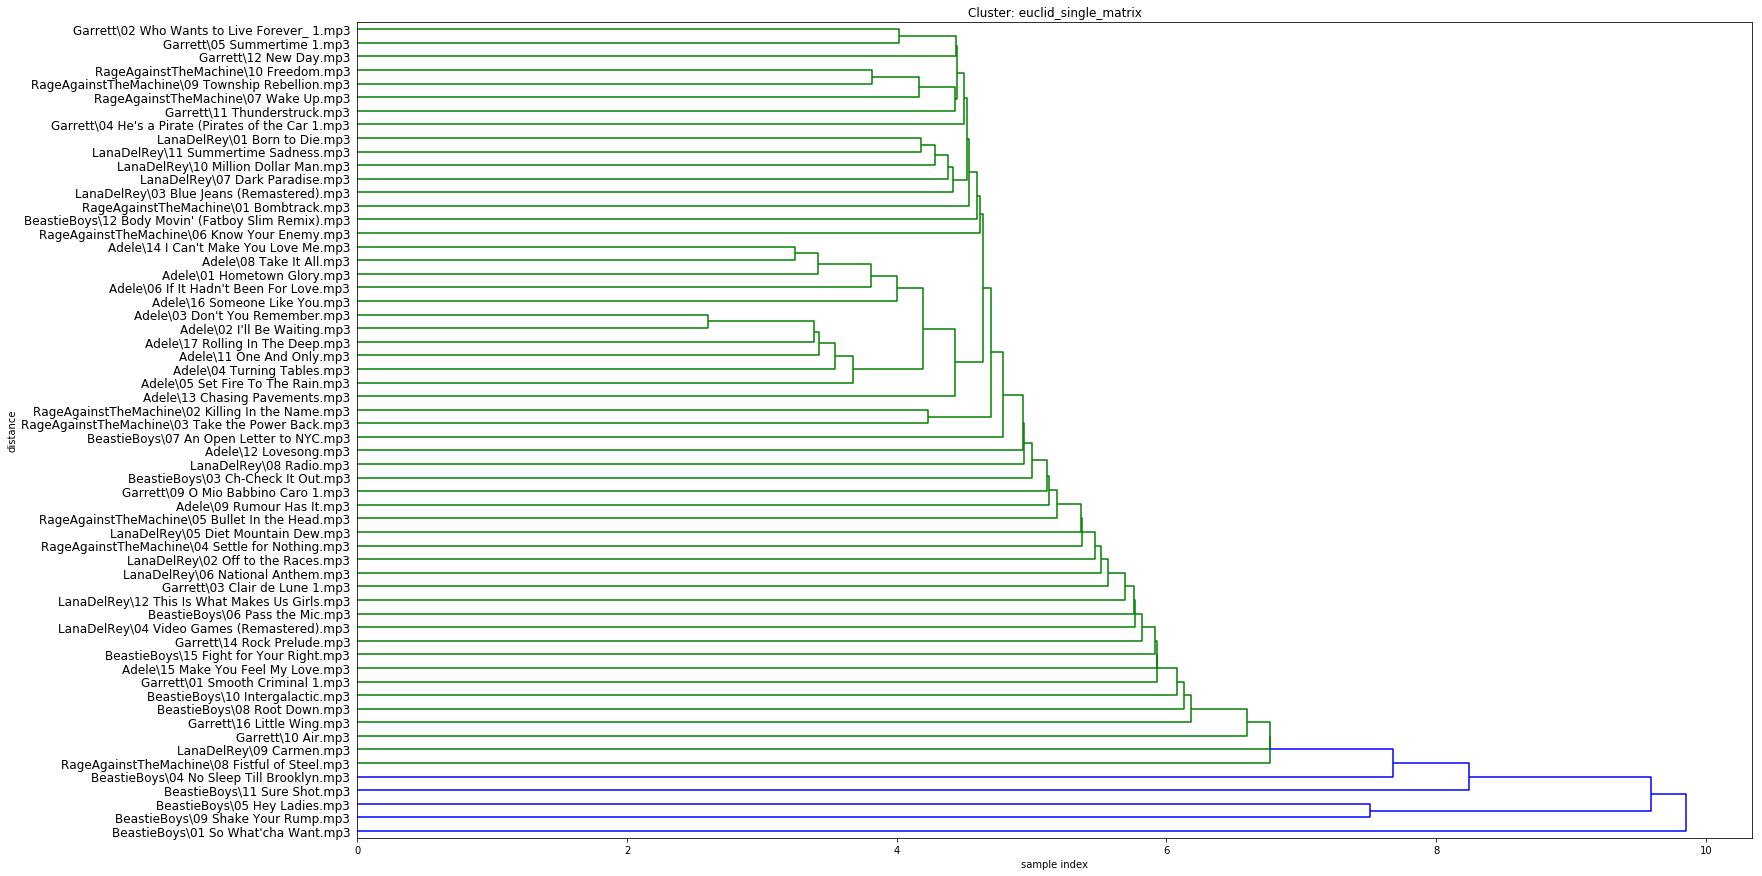

In [145]:
# Z[i] tells in which i-th iteration the clusters where merged
# format [indices1, indices2, distant, sample_count]
# print Z[0]
# Z contains 150 Samples indices 0 - 149, every new clusters is now part of Z

# calculate full dendrogram
plt.figure(figsize=(25, 15))
plt.title('Cluster: euclid_single_matrix')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    euclid_single_matrix,
    labels=labels,
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    orientation = "right"
)
plt.show()

In [109]:
print len(labels)

60


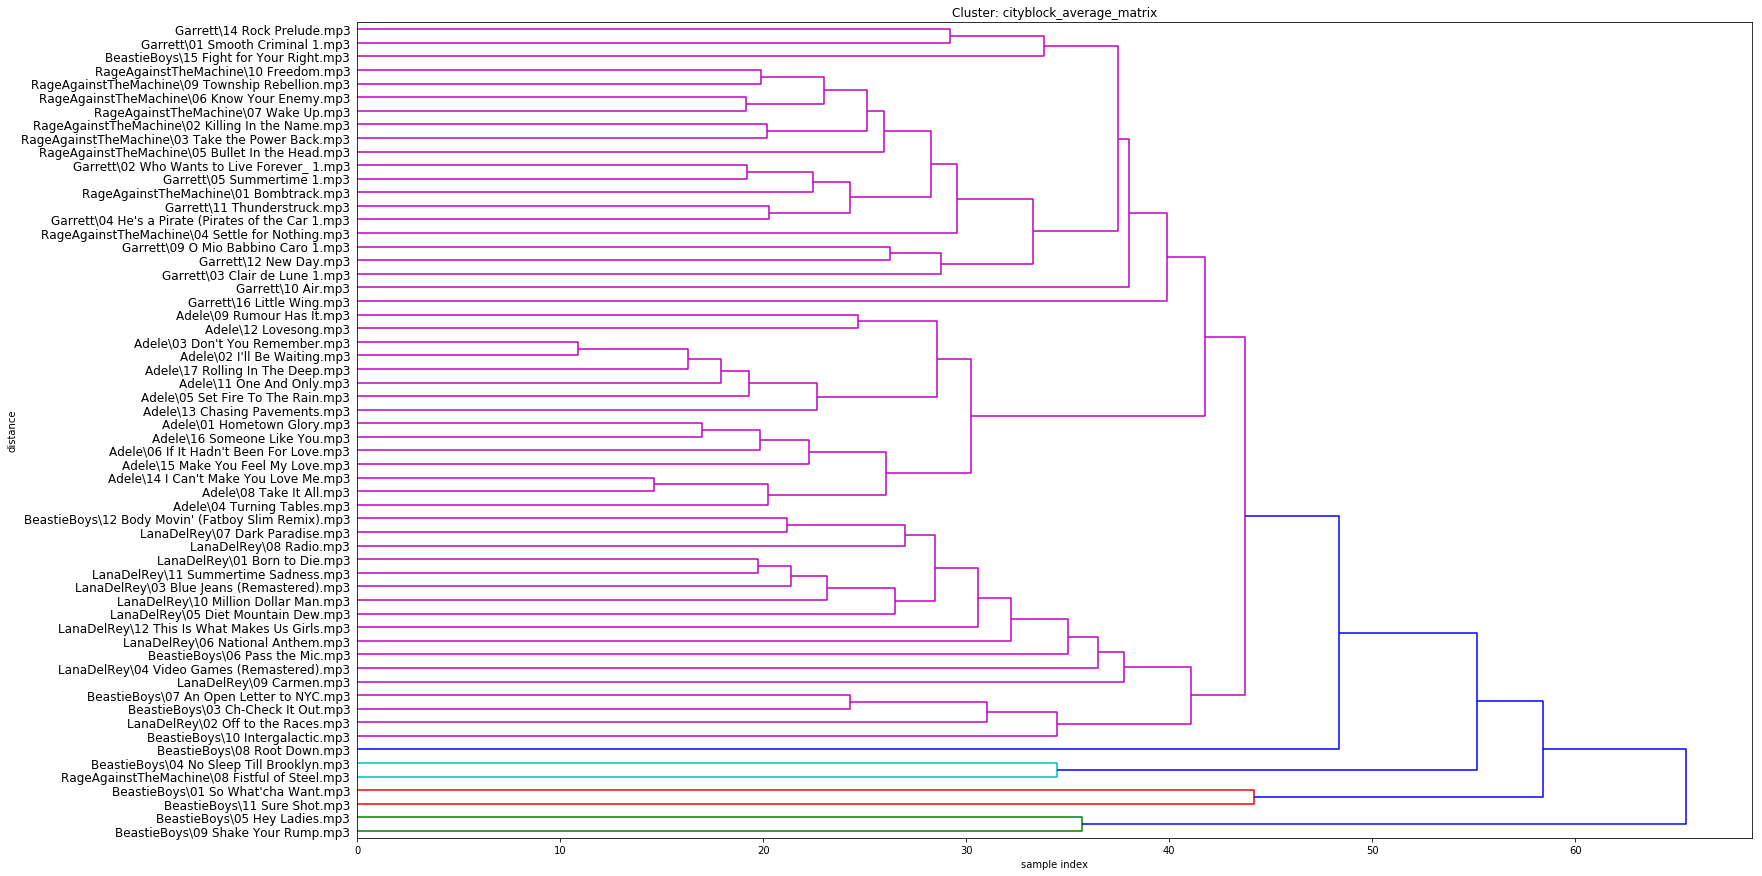

In [146]:
# calculate full dendrogram
plt.figure(figsize=(25, 15))
plt.title('Cluster: cityblock_average_matrix')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    cityblock_average_matrix,
    labels=labels,
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    orientation = "right"
)
plt.show()

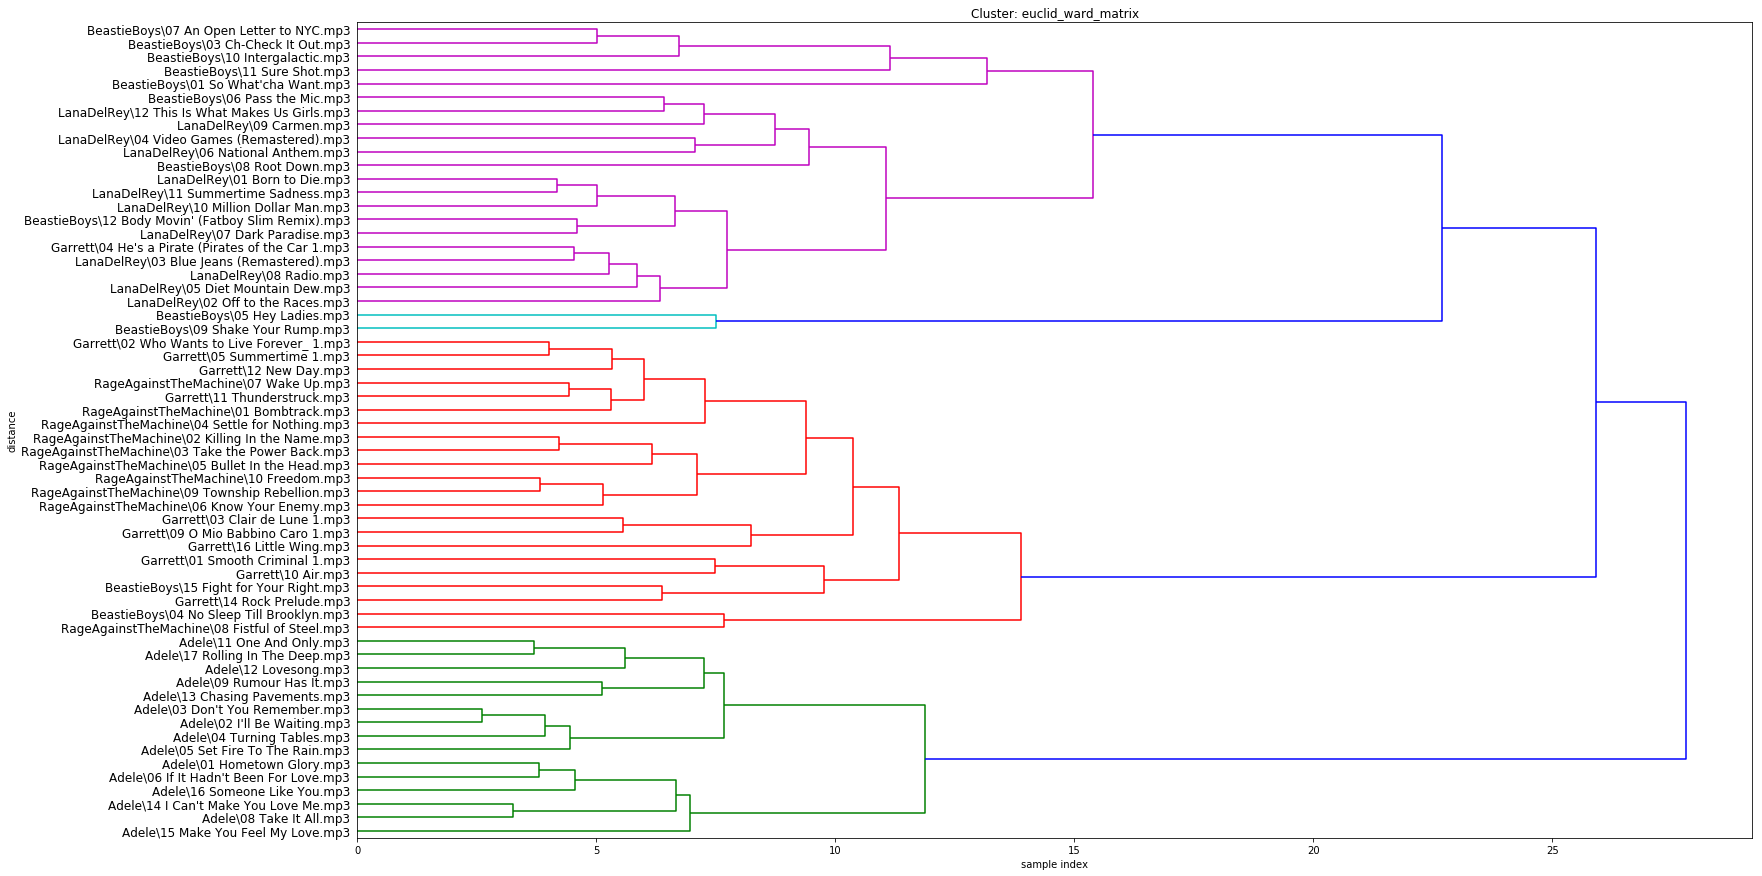

In [147]:
# calculate full dendrogram
plt.figure(figsize=(25, 15))
plt.title('Cluster: euclid_ward_matrix')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    euclid_ward_matrix,
    labels=labels,
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    orientation = "right"
)
plt.show()

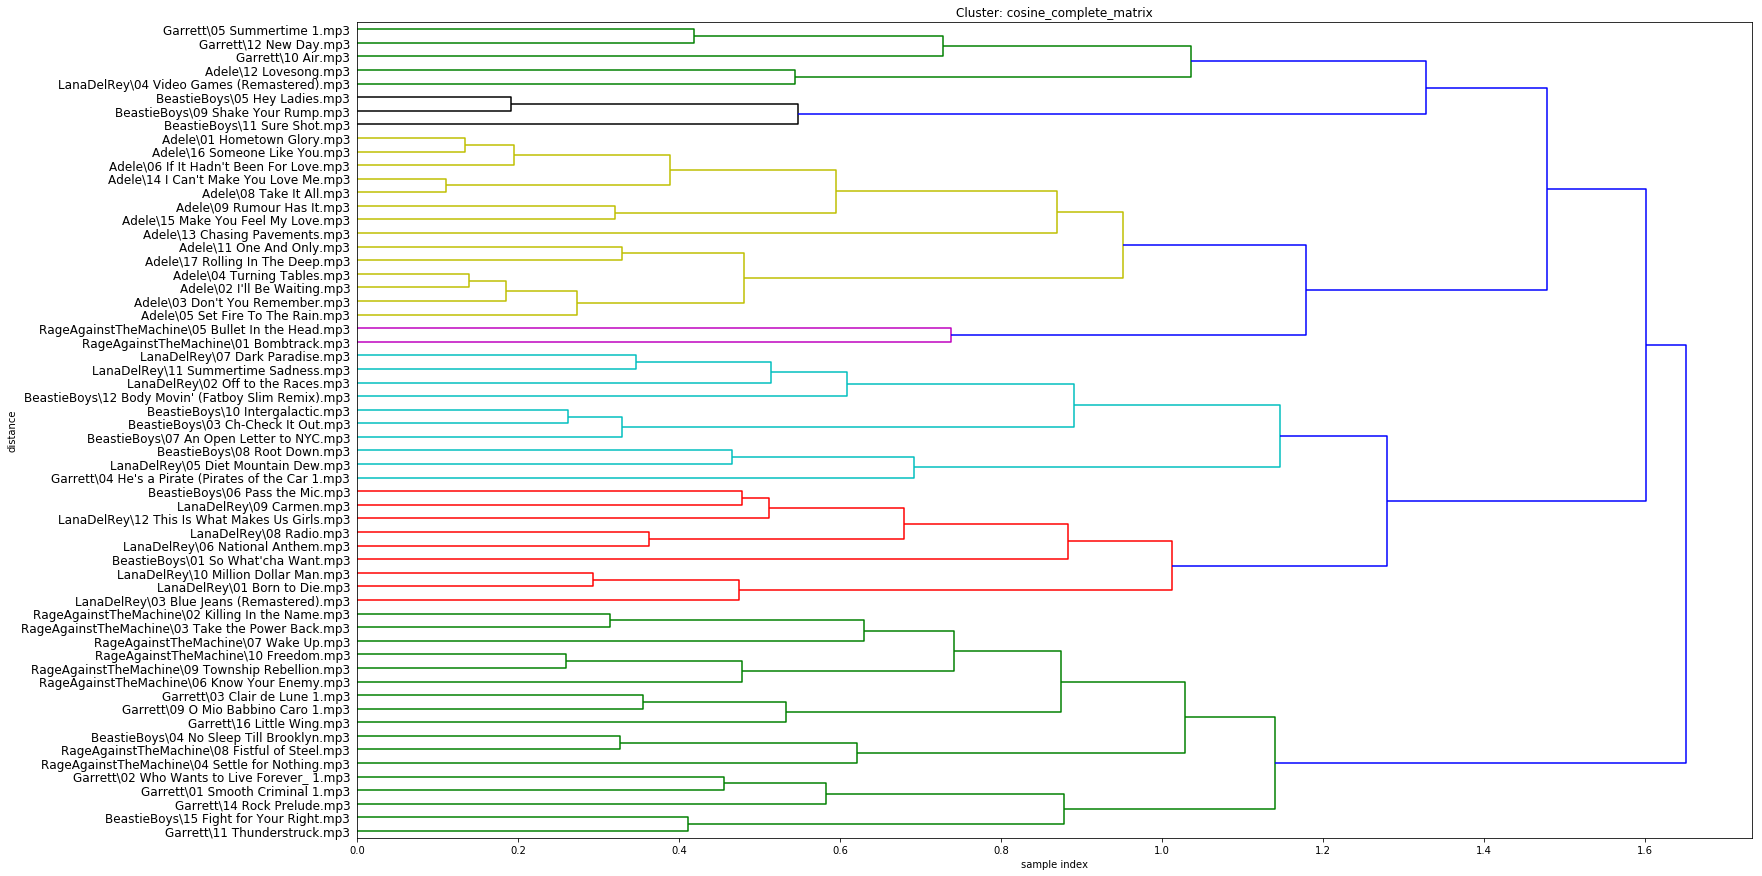

In [148]:
# calculate full dendrogram
plt.figure(figsize=(25, 15))
plt.title('Cluster: cosine_complete_matrix')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    cosine_complete_matrix,
    labels=labels,
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    orientation = "right"
)
plt.show()

<h3 style="color:#FF6347"> Lesen eines Dendograms </h3>
***
* Horizontale Linien, zeigen die zusammengefassten Cluster<br>
* Vertikale Linien, zeigen wer Teil dieses Cluster ist<br>
* Die Höhe eines horizontalen Linie sagt aus, welche Distanz überbrückt werden muss um ein neues Cluster zu formen 
